# Problem Statement

Output variable -> y
<br>y -> Whether the client has subscribed a term deposit or not 
<br> Binomial ("yes" or "no")

In [1]:
# Importing Necessary Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bf = pd.read_csv('bank-full.csv', sep=';')
bf.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Data description

bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
bf.shape

(45211, 17)

In [6]:
bf.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
bf.duplicated().sum()

0

In [8]:
bf = pd.get_dummies(bf, columns=['job','marital','education','contact','month','poutcome', 'default', 'housing', 'loan','y'], drop_first=True)
bf

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,False,False,True,False,True,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,False,False,True,False,True,False,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,True,False,False,False,False,True,False,False,False,True
45207,71,1729,17,456,2,-1,0,False,False,False,...,True,False,False,False,False,True,False,False,False,True
45208,72,5715,17,1127,5,184,3,False,False,False,...,True,False,False,False,True,False,False,False,False,True
45209,57,668,17,508,4,-1,0,True,False,False,...,True,False,False,False,False,True,False,False,False,False


In [9]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  bool 
 8   job_entrepreneur     45211 non-null  bool 
 9   job_housemaid        45211 non-null  bool 
 10  job_management       45211 non-null  bool 
 11  job_retired          45211 non-null  bool 
 12  job_self-employed    45211 non-null  bool 
 13  job_services         45211 non-null  bool 
 14  job_student          45211 non-null  bool 
 15  job_technician       45211 non-null  bool 
 16  job_unemployed       4

#  Splitting Data into Training and Testing Set

In [10]:
x = bf.iloc[:,0:42]
y = bf['y_yes'] 

In [11]:
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,True,False,False,False,False,False,True,False,True,True
3,47,1506,5,92,1,-1,0,True,False,False,...,True,False,False,False,False,False,True,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,False,False,False,...,False,True,False,False,False,False,True,False,False,False
45207,71,1729,17,456,2,-1,0,False,False,False,...,False,True,False,False,False,False,True,False,False,False
45208,72,5715,17,1127,5,184,3,False,False,False,...,False,True,False,False,False,True,False,False,False,False
45209,57,668,17,508,4,-1,0,True,False,False,...,False,True,False,False,False,False,True,False,False,False


In [12]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y_yes, Length: 45211, dtype: bool

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size=0.70, random_state=143)

In [15]:
xtrain

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
41046,45,1433,14,117,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
37470,31,143,13,221,2,-1,0,False,False,False,...,True,False,False,False,False,False,True,False,True,False
30287,56,14344,5,358,1,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,True,False
14255,45,660,14,329,2,-1,0,True,False,False,...,False,False,False,False,False,False,True,False,True,False
39528,40,-310,26,133,2,363,5,True,False,False,...,True,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13231,28,882,8,107,2,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
25121,30,12569,18,87,1,-1,0,False,False,False,...,False,True,False,False,False,False,True,False,False,False
17937,37,0,30,195,4,-1,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
34969,30,501,6,323,2,-1,0,False,True,False,...,True,False,False,False,False,False,True,False,True,True


# Model Building

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg = LogisticRegression()

In [18]:
# Train the Model
lg.fit(xtrain,ytrain)

# Prediction
ypred = lg.predict(xtest)

In [19]:
len(xtest)

13564

In [20]:
len(ypred)

13564

# Model Evaluation

In [21]:
print('Actual Y: ', ytest[:35].values)
print('Predict Y: ', ypred[:35])

Actual Y:  [False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False False False  True]
Predict Y:  [False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False]


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94     12006
        True       0.58      0.25      0.34      1558

    accuracy                           0.89     13564
   macro avg       0.74      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [24]:
confusion_matrix(ytest, ypred)

array([[11729,   277],
       [ 1176,   382]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

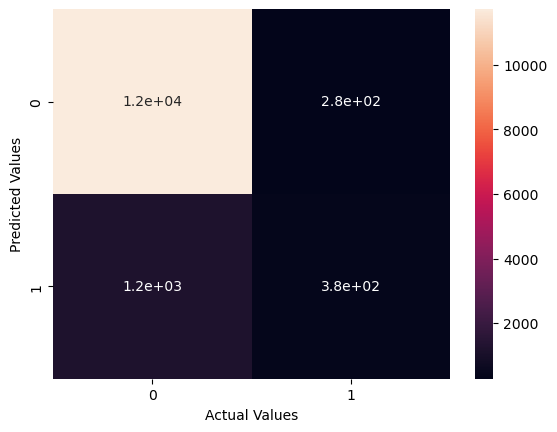

In [25]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')